In [1]:
import numpy as np
import pandas as pd

In [2]:
lap = pd.read_csv(r"C:\Users\91700\Desktop\ML Project\Laptop price prediction APP\laptop_data.csv")
lap.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
802,802,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,79866.72
311,311,Dell,Ultrabook,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16GB,1TB SSD,Intel UHD Graphics 620,Windows 10,1.21kg,133146.72
203,203,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.2kg,93186.72
1286,1286,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
669,669,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,128GB SSD,Intel HD Graphics 520,Linux,2.1kg,21951.36


In [3]:
lap.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [4]:
lap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
lap.duplicated().sum()

0

In [6]:
lap.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
lap.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
lap['Ram'] =lap['Ram'].str.replace('GB','')

In [9]:
lap['Weight'] =lap['Weight'].str.replace('kg','')

In [10]:
lap.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [11]:
lap['Ram'] = lap['Ram'].astype('int32')
lap['Weight'] = lap['Weight'].astype('float32')
lap['Price'] = lap['Price'].astype('int32')

In [12]:
lap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   int32  
dtypes: float32(1), float64(1), int32(2), object(7)
memory usage: 96.8+ KB


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\91700\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Price', ylabel='Density'>

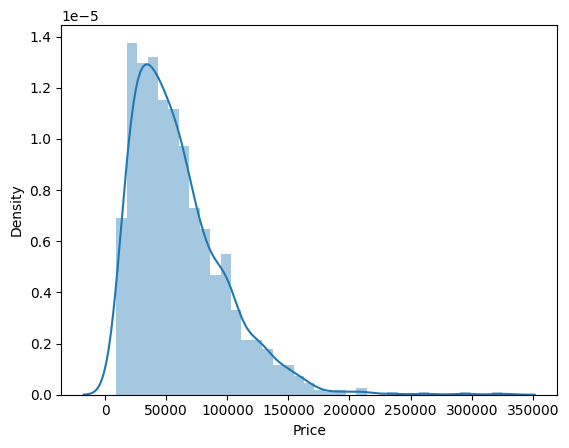

In [14]:
sns.distplot(lap['Price'],)

<AxesSubplot: >

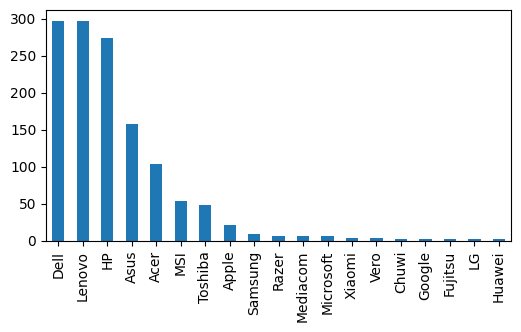

In [15]:
lap.Company.value_counts().plot(kind='bar',figsize=(6,3))

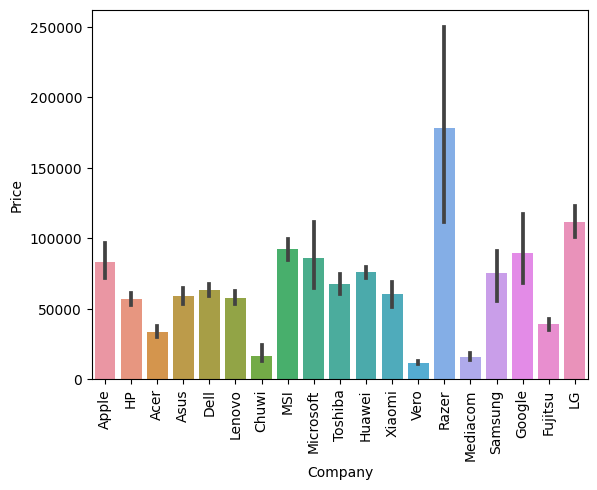

In [16]:
sns.barplot(x=lap['Company'],y=lap['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot: >

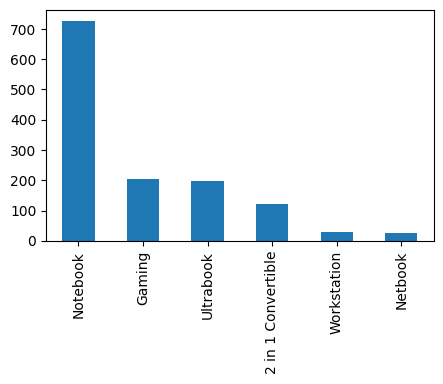

In [17]:
lap['TypeName'].value_counts().plot(kind='bar',figsize=(5,3))

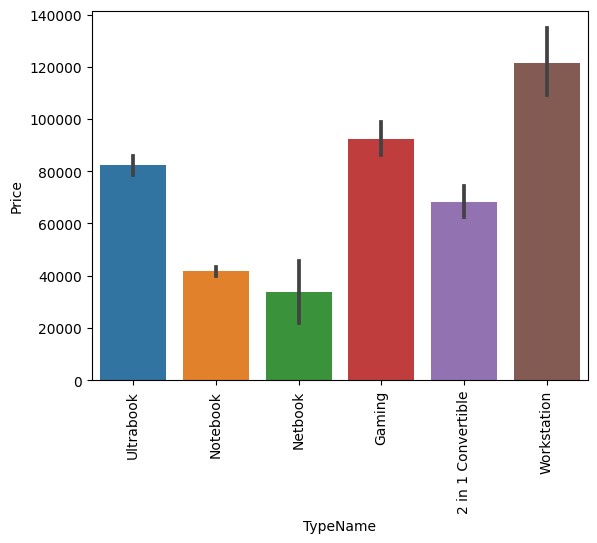

In [18]:
sns.barplot(x=lap['TypeName'],y=lap['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\91700\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Inches', ylabel='Density'>

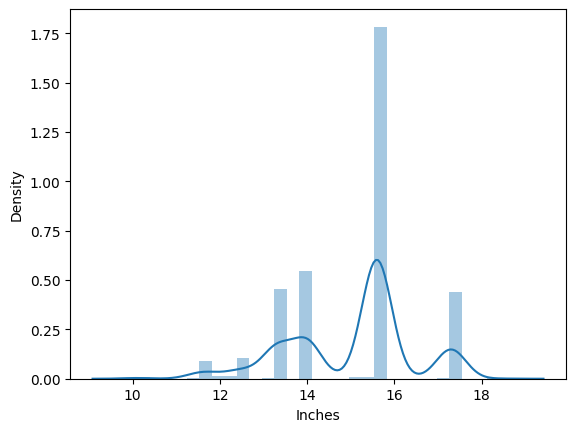

In [19]:
sns.distplot(lap['Inches'])

<AxesSubplot: xlabel='Inches', ylabel='Price'>

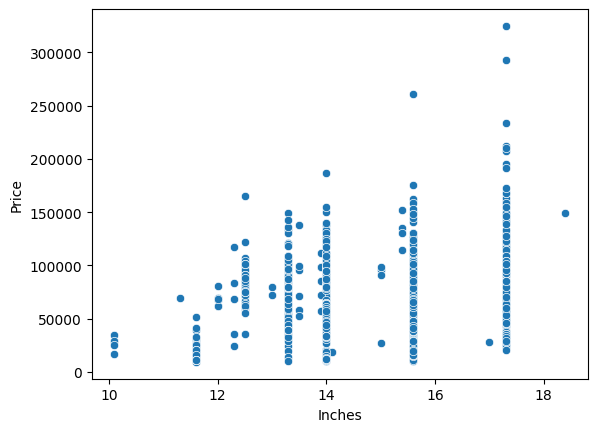

In [20]:
sns.scatterplot(x=lap['Inches'],y=lap['Price'])

In [21]:
lap['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [22]:
lap['Touchscreen'] = lap['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [23]:
lap['Touchscreen'].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

<AxesSubplot: xlabel='Touchscreen', ylabel='Price'>

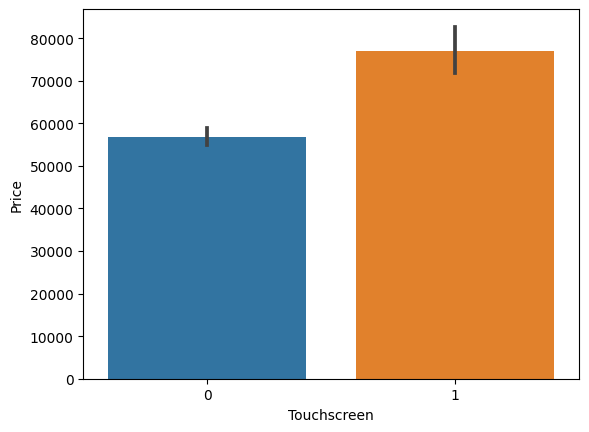

In [24]:
sns.barplot(x= lap['Touchscreen'],y = lap['Price'])

In [25]:
lap['IPS'] = lap['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [26]:
lap['IPS'].value_counts()

0    938
1    365
Name: IPS, dtype: int64

<AxesSubplot: xlabel='IPS', ylabel='Price'>

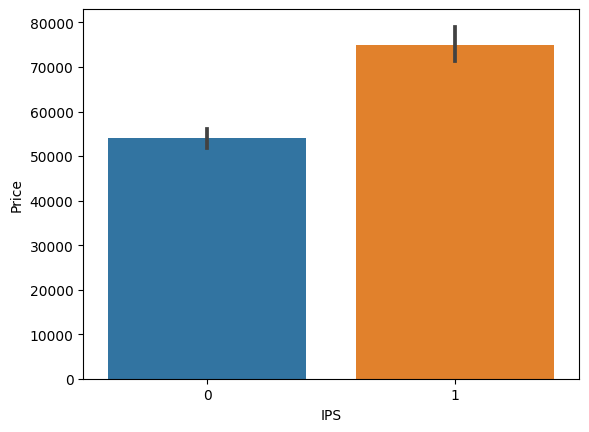

In [27]:
sns.barplot(x= lap['IPS'],y = lap['Price'])

In [28]:

new = lap['ScreenResolution'].str.split('x',n=1,expand=True)
lap['X_res'] = new[0]
lap['Y_res'] = new[1]

In [29]:
lap['X_res'] = lap['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [30]:
lap['X_res'] = lap['X_res'].astype('int32')
lap['Y_res'] = lap['Y_res'].astype('int32')

In [31]:
lap.corr()['Price']

Inches         0.068196
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252207
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [32]:
lap['ppi'] = (((lap['X_res']**2) + (lap['Y_res']**2))**0.5/lap['Inches']).astype('float')

In [33]:
lap.corr()['Price']

Inches         0.068196
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252207
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [34]:
lap.drop(['ScreenResolution'],axis=1,inplace=True)

In [35]:
lap.drop(columns=['X_res'],axis=1,inplace=True)

In [36]:
lap.drop(columns=['Inches','Y_res'],inplace=True)

In [37]:
lap.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005


In [38]:
lap['Cpu_name'] = lap.Cpu.value_counts()

In [39]:

lap['Cpu_name'] = lap.Cpu.apply(lambda x :" " . join(x.split()[0:3]))


In [40]:
def fetch_processor (text):
    if text == 'Intel Core i7' or text == 'Intel Core i5'or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0]== 'Intel':
            return 'Other Intel Processor'
        else:
            return " AMD Processor"

In [41]:
lap['Cpu brand'] = lap['Cpu_name'].apply(fetch_processor)

In [42]:
lap.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot: >

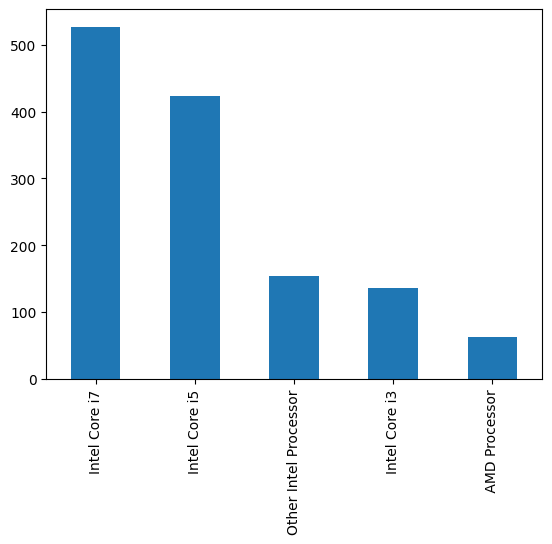

In [43]:
lap['Cpu brand'].value_counts().plot(kind='bar')

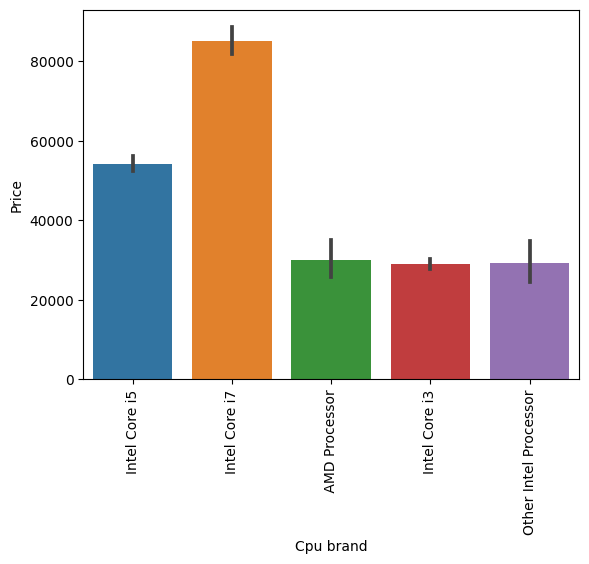

In [44]:
sns.barplot(x= lap['Cpu brand'],y = lap['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [45]:
lap.drop(columns=['Cpu','Cpu_name'],axis=1,inplace=True)

<AxesSubplot: >

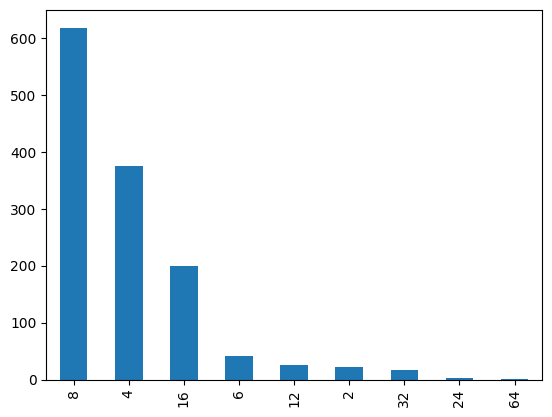

In [46]:
lap.Ram.value_counts().plot(kind='bar')

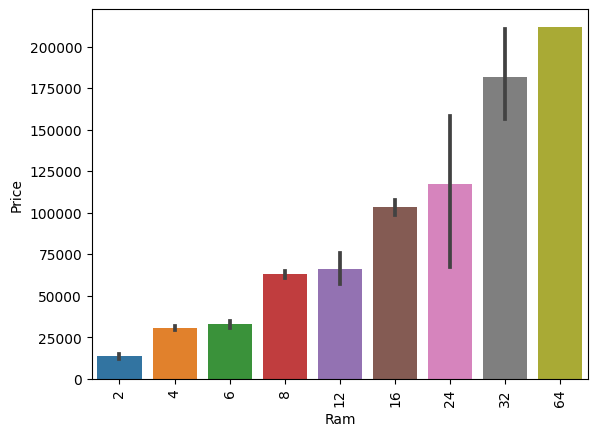

In [47]:
sns.barplot(x= lap['Ram'],y = lap['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [48]:
lap.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [49]:
lap['Memory'] = lap['Memory'].astype(str).replace('\.0', '', regex=True)
lap["Memory"] = lap["Memory"].str.replace('GB', '')
lap["Memory"] = lap["Memory"].str.replace('TB', '000')
new = lap["Memory"].str.split("+", n = 1, expand = True)

lap["first"]= new[0]
lap["first"]=lap["first"].str.strip()

lap["second"]= new[1]

lap["Layer1HDD"] = lap["first"].apply(lambda x: 1 if "HDD" in x else 0)
lap["Layer1SSD"] = lap["first"].apply(lambda x: 1 if "SSD" in x else 0)
lap["Layer1Hybrid"] = lap["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
lap["Layer1Flash_Storage"] = lap["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

lap['first'] = lap['first'].str.replace(r'\D', '')

lap["second"].fillna("0", inplace = True)

lap["Layer2HDD"] = lap["second"].apply(lambda x: 1 if "HDD" in x else 0)
lap["Layer2SSD"] = lap["second"].apply(lambda x: 1 if "SSD" in x else 0)
lap["Layer2Hybrid"] = lap["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
lap["Layer2Flash_Storage"] = lap["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

lap['second'] = lap['second'].str.replace(r'\D', '')

lap["first"] = lap["first"].astype(int)
lap["second"] = lap["second"].astype(int)

lap["HDD"]=(lap["first"]*lap["Layer1HDD"]+lap["second"]*lap["Layer2HDD"])
lap["SSD"]=(lap["first"]*lap["Layer1SSD"]+lap["second"]*lap["Layer2SSD"])
lap["Hybrid"]=(lap["first"]*lap["Layer1Hybrid"]+lap["second"]*lap["Layer2Hybrid"])
lap["Flash_Storage"]=(lap["first"]*lap["Layer1Flash_Storage"]+lap["second"]*lap["Layer2Flash_Storage"])

lap.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\91700\AppData\Local\Temp\ipykernel_10700\3630399599.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  lap['first'] = lap['first'].str.replace(r'\D', '')
C:\Users\91700\AppData\Local\Temp\ipykernel_10700\3630399599.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  lap['second'] = lap['second'].str.replace(r'\D', '')


In [50]:
lap.drop(columns=["Memory"],inplace=True)

In [51]:
lap.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252207
ppi              0.473487
HDD             -0.096442
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [52]:
lap.drop(columns=["Hybrid",'Flash_Storage'],inplace=True)

In [53]:
lap.Gpu.value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [54]:
lap['Gpu brand'] = lap.Gpu.apply(lambda x : x .split()[0])
lap.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel


In [55]:
lap['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [56]:
lap = lap[lap['Gpu brand'] != 'ARM']

In [57]:
lap['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

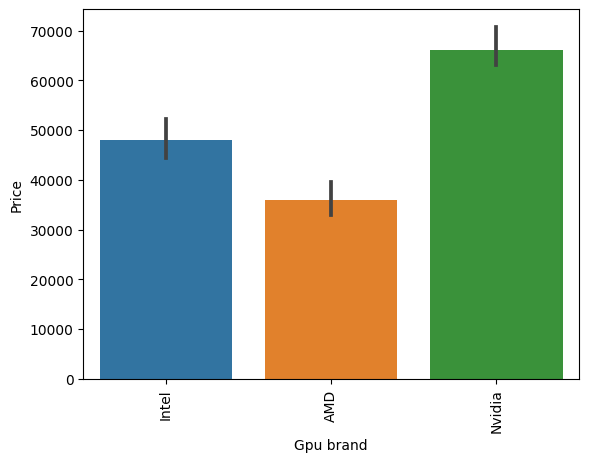

In [58]:
sns.barplot(x= lap['Gpu brand'],y = lap['Price'],estimator = np.median)
plt.xticks(rotation = 'vertical')
plt.show()

In [59]:
lap.drop(columns=['Gpu'],inplace =True)

In [60]:
lap.OpSys.value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

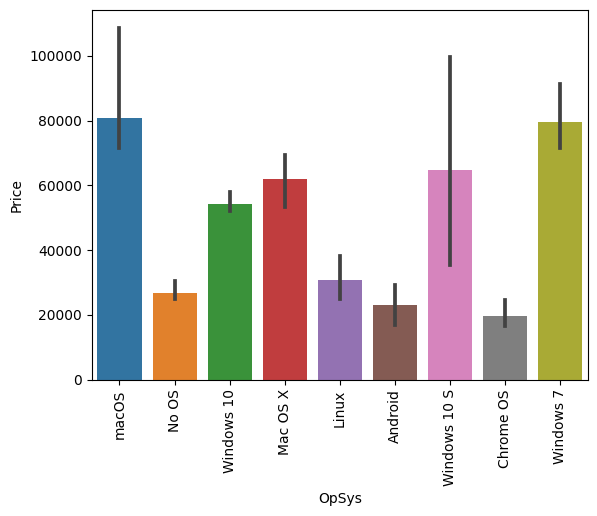

In [61]:
sns.barplot(x= lap['OpSys'],y = lap['Price'],estimator = np.median)
plt.xticks(rotation = 'vertical')
plt.show()

In [62]:
def catos (inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    else:
        if inp == 'macOS' or inp == 'Mac OS X':
            return 'Mac'
        else:
            return 'Others'

In [63]:
lap['os'] = lap['OpSys'].apply(catos)

In [64]:
lap.drop(columns=['OpSys'],inplace=True)


In [65]:
lap.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


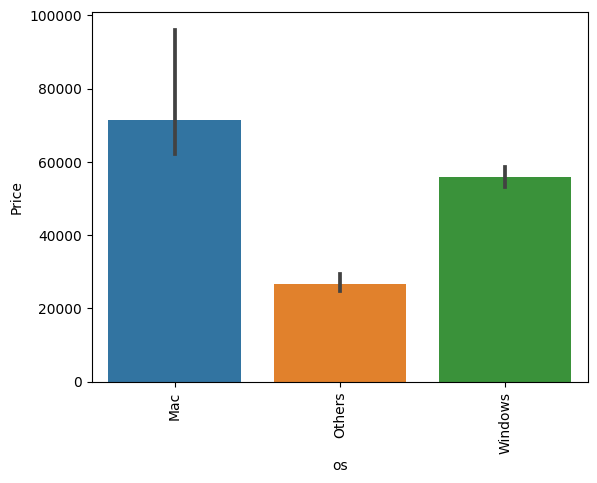

In [66]:
sns.barplot(x= lap['os'],y = lap['Price'],estimator = np.median)
plt.xticks(rotation = 'vertical')
plt.show()

C:\Users\91700\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Weight', ylabel='Density'>

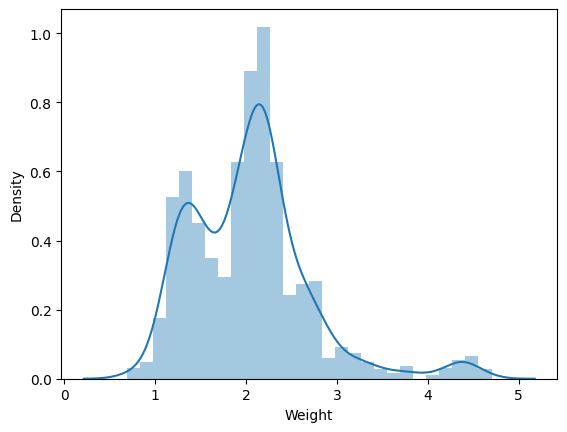

In [67]:
sns.distplot(lap['Weight'])

<AxesSubplot: xlabel='Weight', ylabel='Price'>

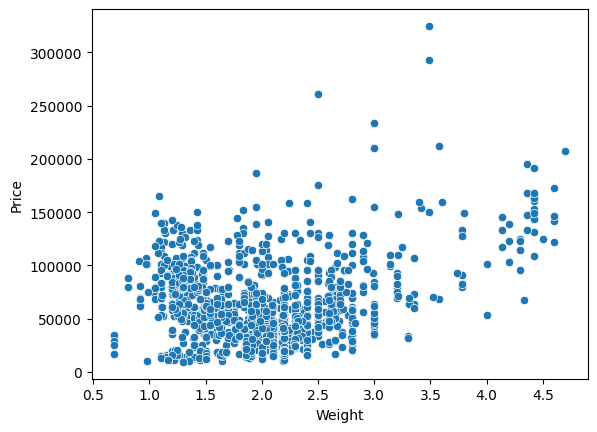

In [68]:
sns.scatterplot(x = lap.Weight,y = lap.Price)

In [69]:
lap.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253319
ppi            0.475368
HDD           -0.096892
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot: >

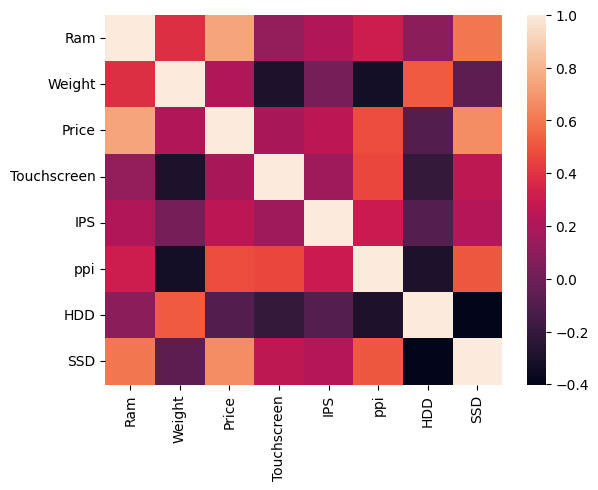

In [70]:
sns.heatmap(lap.corr())

C:\Users\91700\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Price', ylabel='Density'>

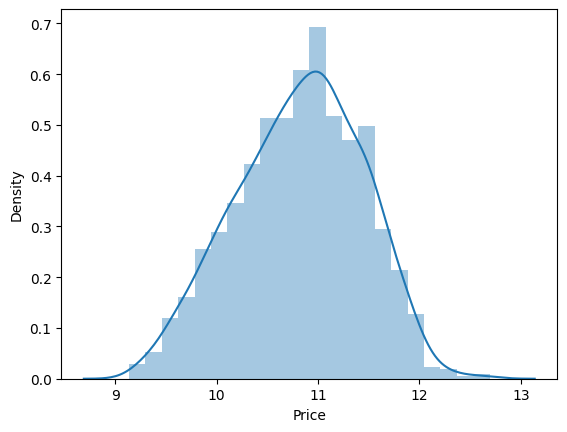

In [71]:
sns.distplot(np.log(lap.Price))

In [72]:
x = lap.drop(columns=['Price'])
y = np.log(lap.Price)

In [73]:
x.head()

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [74]:
y.head()

0    11.175745
1    10.776766
2    10.329931
3    11.814473
4    11.473093
Name: Price, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=64)

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error


In [78]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [79]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder = 'passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2', LinearRegression())])

In [80]:
y_pred = pipe.predict(x_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAe',mean_absolute_error(y_test,y_pred))

R2 Score 0.8210429902438028
MAe 0.21552971453060613


In [81]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder = 'passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAe',mean_absolute_error(y_test,y_pred))

R2 Score 0.8063285834350119
MAe 0.22100484441550539


In [82]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder = 'passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAe',mean_absolute_error(y_test,y_pred))

R2 Score 0.8094311320721175
MAe 0.22114931305614402


In [83]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder = 'passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAe',mean_absolute_error(y_test,y_pred))

R2 Score 0.7824759788339921
MAe 0.21461862144022115


In [84]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder = 'passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAe',mean_absolute_error(y_test,y_pred))

R2 Score 0.8247575394920534
MAe 0.1998107742358408


In [85]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder = 'passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAe',mean_absolute_error(y_test,y_pred))

R2 Score 0.7885551919944953
MAe 0.20529424123489773


In [86]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder = 'passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                           random_state=3,
                           max_samples=0.5,
                           max_features = 0.75,
                           max_depth = 15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAe',mean_absolute_error(y_test,y_pred))

R2 Score 0.8803933636462576
MAe 0.16502263976305753


In [87]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder = 'passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAe',mean_absolute_error(y_test,y_pred))

R2 Score 0.8010929792595849
MAe 0.23093296238456557


In [88]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder = 'passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAe',mean_absolute_error(y_test,y_pred))

R2 Score 0.8852240957839577
MAe 0.16411389070845273


In [89]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder = 'passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAe',mean_absolute_error(y_test,y_pred))

R2 Score 0.8983621591151835
MAe 0.15211842008999765


## voting Regressor

In [90]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15,bootstrap=True)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8864267976816395
MAE 0.1658544054747563


In [91]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8812147776334824
MAE 0.17413132504323792


In [92]:
import pickle

In [93]:
pickle.dump(lap,open('lap1.pkl','wb'))
pickle.dump(pipe,open('pipe1.pkl','wb'))            

In [95]:
lap.head()


,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [99]:
st = ['Company','TypeName','Cpu brand','Gpu brand','os']

In [103]:
for i in st:
    print(lap[i].value_counts().head(10))
  
    

Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Toshiba     48
Apple       21
Samsung      8
Razer        7
Name: Company, dtype: int64
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: TypeName, dtype: int64
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
 AMD Processor            62
Name: Cpu brand, dtype: int64
Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64
Windows    1125
Others      156
Mac          21
Name: os, dtype: int64
